<a href="https://colab.research.google.com/github/Tinashemuza/Modeling/blob/main/Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=Black> <center>**Machine Learning 1**




# Project Liabriaries

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from IPython.display import Image, display
import matplotlib.pyplot as plt
import graphviz

#Ridge Regression
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Set random seed
SEED = 123456
np.random.seed(SEED)
random.seed(SEED)

## <font color=blue>**RIDGE Regression**
















To demostrate Ridge regression, we create a synthetic dataset with 5 loosely correlated to each other features, then we create 5 features that are highly correlated to the original 5. This dataset has a target varible that somewhat correlated to a linear combination of the original 5 features.

Here is the correlation matrix:

In [ ]:
# Rgression data stimulation
X, y = make_regression(n_samples=10000, n_features=5, noise=2, random_state=SEED)


# Creating new feature correlated to original feature
noise = np.random.normal(loc=0, scale=0.1, size=X.shape)
correlated_features = X + noise

# Combining new feature to original features extanding the feature set
X_extended = np.hstack((X, correlated_features))

# Converting extended feature set to a pandas DataFrame
df = pd.DataFrame(X_extended)


correlation_matrix = df.corr()
print(correlation_matrix)


          0         1         2         3         4         5         6  \
0  1.000000  0.004286 -0.000881  0.006717  0.009077  0.995248  0.004939   
1  0.004286  1.000000 -0.023174 -0.004376  0.006919  0.004099  0.995104   
2 -0.000881 -0.023174  1.000000  0.002369 -0.004167 -0.001075 -0.024930   
3  0.006717 -0.004376  0.002369  1.000000  0.009731  0.007687 -0.004867   
4  0.009077  0.006919 -0.004167  0.009731  1.000000  0.007729  0.009533   
5  0.995248  0.004099 -0.001075  0.007687  0.007729  1.000000  0.004772   
6  0.004939  0.995104 -0.024930 -0.004867  0.009533  0.004772  1.000000   
7 -0.000384 -0.022885  0.994817  0.001644 -0.003928 -0.000589 -0.024567   
8  0.005559 -0.004267  0.001799  0.995011  0.008825  0.006491 -0.004661   
9  0.010531  0.005967 -0.004262  0.009757  0.994986  0.008955  0.008531   

          7         8         9  
0 -0.000384  0.005559  0.010531  
1 -0.022885 -0.004267  0.005967  
2  0.994817  0.001799 -0.004262  
3  0.001644  0.995011  0.009757  
4 -0

You can see, for example, that feature 0 is highly correlated to feature 5. Thus, using ridge regression helps us to minimise or handle multicollinearity in our data by pernalizing large coefficients in our following steps.

Now, we split our data into traing, validation and test sets and find the best regularisation parameter according to the validation set.

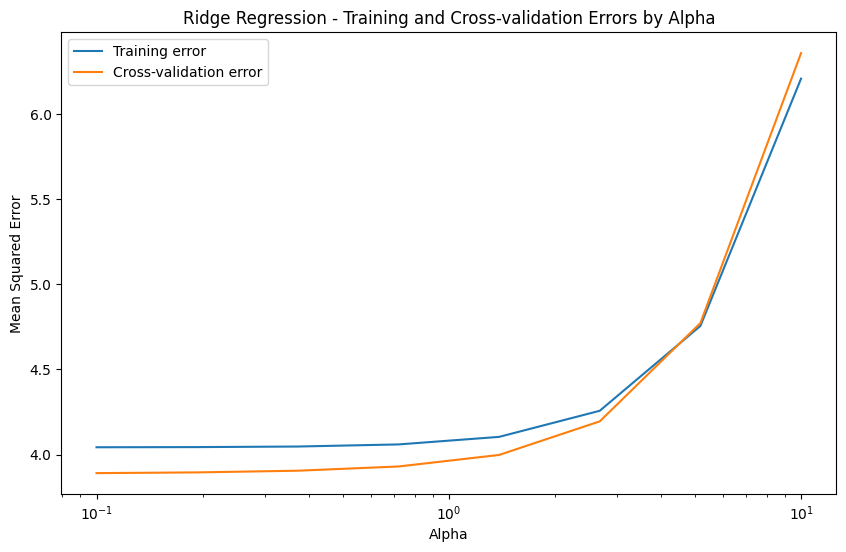

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=SEED)

# Range of alpha values
alpha_values = np.logspace(-1, 1, 8)

# An Array to store values
train_errors = []
val_errors = []

# Model training and evaluation for each alpha
for alpha in alpha_values:

    model = Ridge(alpha=alpha) # Ridge Regression model
    model.fit(X_train, y_train) # Model fitting to training data

    # Model evaluatio
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

#Mean squared error for training and validation sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Graphs of the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_errors, label='Training error')
plt.plot(alpha_values, val_errors, label='Cross-validation error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression - Training and Cross-validation Errors by Alpha')
plt.legend()
plt.show()


* From our illustration above we  generate a plot showing how the mean squared error on both training and cross-validation sets varies with different values of alpha -- the regularization strength.

* We then use the regression function from sklearn.datasets to generate a synthetic regression dataset, and the Ridge class from sklearn.linear_model is used to create the Ridge Regression model.

* We split the dataset into training and cross-validation sets, and the model is trained and evaluated for a range of alpha values. The results are then plotted to illustrate the effect of regularization.

In [ ]:
# Finding index of minimum MSE in val_errors list
min_mse_index = val_errors.index(min(val_errors))

# Finding corresponding alpha value
best_alpha = alpha_values[min_mse_index]

# Print the best alpha value and its corresponding MSE
print(f"Best alpha: {best_alpha}")
print(f"Training MSE for the best alpha: {train_errors[min_mse_index]}")
print(f"Cross-validation MSE for the best alpha: {val_errors[min_mse_index]}")

Best alpha: 0.1
Training MSE for the best alpha: 4.043608483333656
Cross-validation MSE for the best alpha: 3.891801974436262


Now we fit the model with the best found alpha on the training set and obtain the final model score on the test set:


In [ ]:
model = Ridge(alpha=0.1) # Ridge Regression model
model.fit(X_train, y_train) # Model fitting to train data
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE for the best alpha:: {test_mse}")

Test MSE for the best alpha:: 3.875913429993314


Here are our model coefficients:

In [ ]:
np.set_printoptions(suppress=True)
np.round(model.coef_, 3)

array([80.748, 63.659, 46.952, 44.3  , 80.247,  0.027, -0.105, -0.283,
        0.135,  0.277])

Note, that the coefficients for the highly correlated features (the last 5) were shrinked by the Ridge algorithm.

###**<font color=grey>Illustrations**


The graph below shows the bias-variance trade off in ridge regression as a function of the regularization parameter ( alpha).

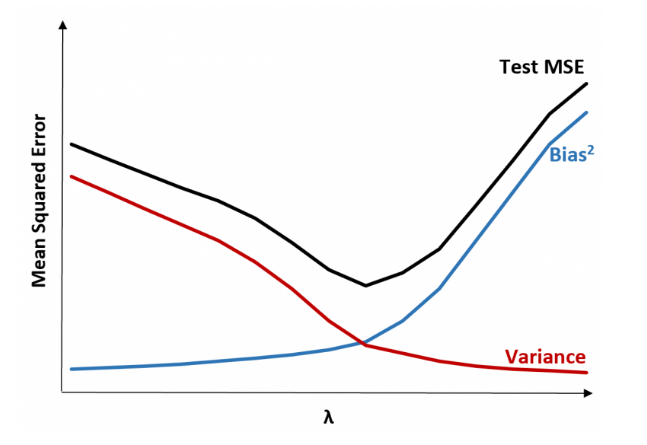

* Mean Square Error (MSE) curve black line

* Bias Squared (Blue Line)

* Variance (Red Line)


* For a low λ : low bias and high variance, usually the model overfits the training data

* For a high λ: high bias and low variance, usually the model underfits the data leading to worse regularization

* For an optimal λ : it minimise the MSE by looking for balance between bias and variance. Usually for the middle range of the λ values.



The bias-variance trade-off graph, shows that neither very low nor very high regularization is good. However, a moderate amount of regularization usually gives the best performance on unseen data through striking a balance between bias and variance.

###**<font color=orange>Graph for Regularization Effect on Coefficients:**

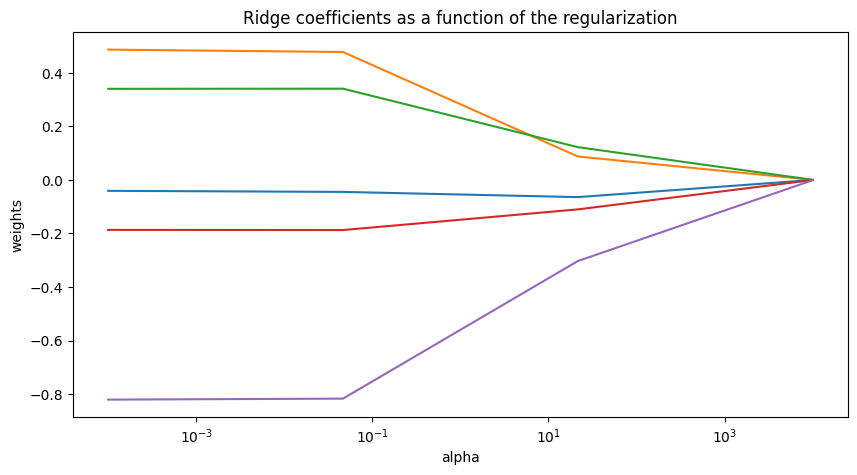

In [ ]:
# Generate some synthetic data (for illustration purposes)
np.random.seed(SEED)
n_samples, n_features = 10, 5
X = np.random.randn(n_samples, n_features)
y = np.random.randn(n_samples)

# Paths
alphas = np.logspace(-4, 4, 4)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Results Visualisation
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


* As alpha increases, regularization becomes stronger. The coefficients begin to shrink toward zero. Thus, the model imposes greater penalties on larger coefficients.This can be shown by blue and orange lines, where the coefficients steadily decrease as alpha grows.

* When alpha becomes very large (close to 10^3), our coefficients converge to nearly zero. This is a case of strong regularization, where the model is highly constrained, and coefficients are greatly pernalised.


Our graph above presents how Ridge regression coefficients change as a function of the alpha, thus, regularization strength.

* X-axis represents different values of alpha on a logarithmic scale
* Y-axis shows the values of the model’s coefficients (or weights)

This graph can help us to understand how ridge regression controls the trade-off between bias and variance by adjusting alpha and observing how the model's coefficients are regularized. Our goal will be to find an optimal alpha that strikes a balance between low bias and low variance (regularization).

## <font color=blue>**K-Means Clustering**

The K-means clustering computation began with data generation, which is random data generated with a standard deviation of 0.90. This data is then visualized to show its distribution, basically shown as evidence of its randomness. Then we move on to determining the number of clusters (k). Our method for determining clusters is the “Elbow method”. There are 3 key steps in the usage of the elbow method. First, we initialize k-means for k values from 1 to 10, fit it to the model, and then record the within-cluster sum of squares (WCSS) for each k. The number of clusters (k) with the optimal value is identified using the elbow graph, which you can find below. In our case, using the bend in the graph we identify 3 clusters as the optimal k.
We then fit the model using the optimal k value (k=3), visualize our results and even proceed to evaluate our cluster quality using the silhouette score, which yielded a score of 0.5195, indicating moderate cluster quality.

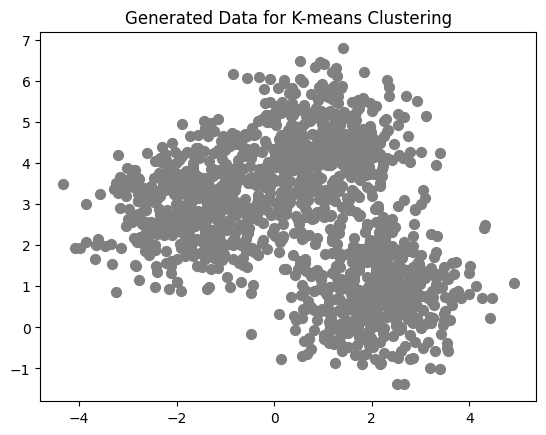

In [ ]:
# Generating sample data
np.random.seed(SEED)
X, y = make_blobs(n_samples=1500, cluster_std=0.9, random_state=0)

# Visualizing the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, c='grey')
plt.title("Generated Data for K-means Clustering")
plt.show()

### Elbow Method

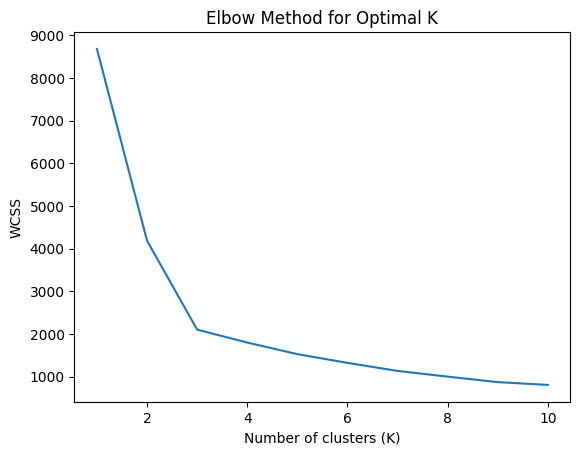

In [ ]:
# Elbow method for number of Clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

### Clustering Result and Visualisation

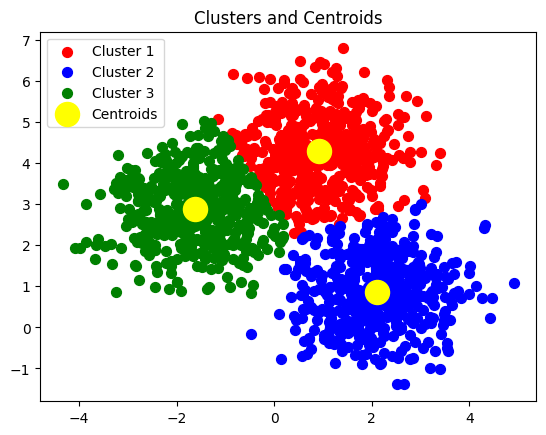

In [ ]:
# Fitting the model with the optimal number of clusters

optimal_k = 3  # reading elbow graph that indicates 4 clusters
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", max_iter=300, n_init=10, random_state=SEED)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clustering results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Mark the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title("Clusters and Centroids")
plt.legend()
plt.show()

### Model Evaluation Using Silhoutte Score

In [ ]:
# Model Evaluation Using Silhouette Score

sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for K = {optimal_k}: {sil_score}")

Silhouette Score for K = 3: 0.5195390837157876


## <font color=blue>**Classification trees**











For an example, we will generate a dataset of 10000 persons, ~50% of which are humans and ~50% are unicorns. Humans, on average have higher height, they have wider variety of professions and less variety of skin colors. Some unicorns can fly even if they are not aviators, and some of them know magic while not being magicians or witches.

Our task is to build a model that can predict if a person is a unicorn or a human given their characteristics.

In [ ]:
n_rows = 10000
human_professions = ['witch', 'aviator', 'sorcerer', 'magician', 'jobless', 'warrior', 'teacher', 'chef', 'artist', 'engineer']
unicorn_professions = ['jobless', 'warrior', 'pet', 'artist']
human_skin_colors = ['fair', 'light', 'medium', 'olive', 'brown', 'dark']
unicorn_skin_colors = ['white', 'pink', 'purple', 'blue', 'green', 'silver', 'gold', 'rainbow']
all_skin_colors = list(set(human_skin_colors + unicorn_skin_colors))

np.random.seed(SEED)
random.seed(SEED)

data = []

for i in range(n_rows):
    if random.random() < 0.5:  # 50% chance of being human
        type_ = 'human'
        height = np.random.normal(170, 20)  # Normal distribution around 170 cm

        # 98% chance of human profession, 2% chance of unicorn profession
        if random.random() < 0.98:
            profession = np.random.choice(human_professions)
        else:
            profession = np.random.choice(unicorn_professions, p=[0.60, 0.25, 0.05, 0.10])

        can_fly = profession == 'aviator'
        knows_magic = profession in ['witch', 'sorcerer', 'magician']

        # 98% chance of human skin color, 2% chance of unicorn skin color
        if random.random() < 0.98:
            skin_color = np.random.choice(human_skin_colors)
        else:
            skin_color = np.random.choice(unicorn_skin_colors)
    else:
        type_ = 'unicorn'
        height = np.random.normal(150, 30)  # Normal distribution around 150 cm

        # 98% chance of unicorn profession, 2% chance of human profession
        if random.random() < 0.98:
            profession = np.random.choice(unicorn_professions, p=[0.60, 0.25, 0.05, 0.10])
        else:
            profession = np.random.choice(human_professions)

        can_fly = (random.random() < 0.2) or (profession == 'aviator') # 20% chance of flying even if not aviator
        knows_magic = (random.random() < 0.25) or (profession in ['witch', 'sorcerer', 'magician'])  # 25% chance of knowing magic disregarding of profession
        skin_color = np.random.choice(all_skin_colors)

    data.append({
        'Type': type_,
        'Height': round(height, 1),
        'Profession': profession,
        'Can_fly': can_fly,
        'Knows_magic': knows_magic,
        'Skin_color': skin_color
    })

df = pd.DataFrame(data)
categorical = ['Profession', 'Skin_color']
numeric = ['Height']
boolean = ['Can_fly', 'Knows_magic']
df.head()


,Type,Height,Profession,Can_fly,Knows_magic,Skin_color
0,unicorn,164.1,jobless,True,True,gold
1,human,164.3,jobless,False,False,fair
2,human,147.2,jobless,False,False,olive
3,human,157.2,sorcerer,False,True,medium
4,unicorn,145.0,jobless,False,False,pink


We'll train a classification tree via scikit-learn's DecisionTreeClassifier with maximal depth of 3 on a stratified train set (80% of the data) and plot the tree.

We'll keep all other hyperparameters to be default. Namely, we'll use Gini impurity as our criterion.

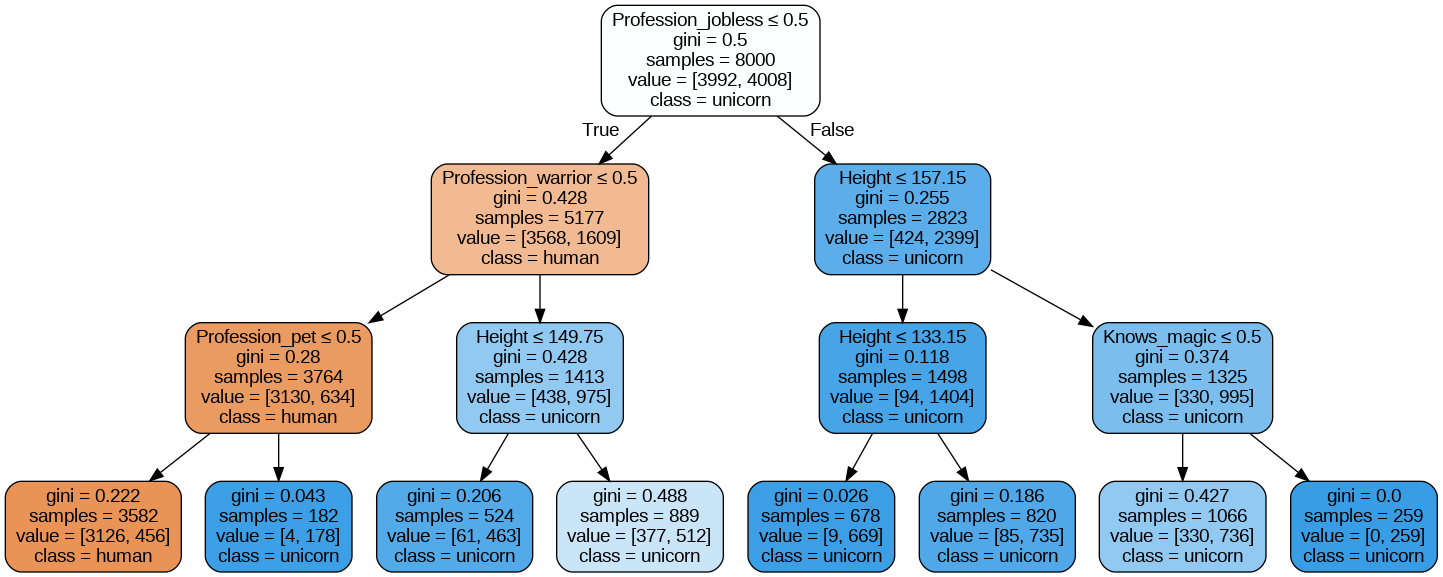

In [ ]:
# Train-test split
X = df.drop(['Type'], axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

# One-hot encoding of the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical),
        ('num', 'passthrough', numeric),
        ('bool', 'passthrough', boolean)
    ],
    remainder='passthrough'
)

# Create and train the model
clf = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree_model = make_pipeline(preprocessor, clf)
tree_model.fit(X_train, y_train)

# Get feature names after one-hot encoding
ohe = tree_model.named_steps['columntransformer'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical).tolist()
feature_names = cat_feature_names + numeric + boolean

# Plot the tree
dot_data = export_graphviz(tree_model[-1], out_file=None,
                           feature_names=feature_names,
                           class_names=tree_model[-1].classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_graphviz", format="png")
png_data = graph.pipe(format='png')
display(Image(png_data))

We can see that, due to the small maximal debth, the model classifies a person who is not jobless, not a warrior and not a pet as a human and everyone else -- as a unicorn.

Let's apply our model to the test set and look at the accuracy and ROC AUC scores:

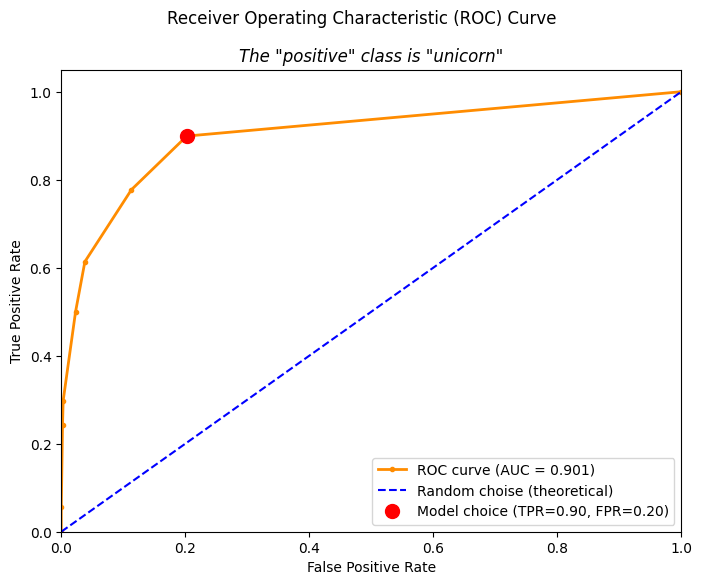


Classification Report:

              precision    recall  f1-score   support

       human       0.89      0.80      0.84       998
     unicorn       0.82      0.90      0.86      1002

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
# Predict on a test set and get probabilities
y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]

# Convert string labels to binary
y_test_binary = (y_test == 'unicorn').astype(int)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', marker=".", label=f'ROC curve (AUC = {roc_auc:.3f})', lw=2)
plt.plot([0, 1], [0, 1], color='b', linestyle='--', label='Random choise (theoretical)')

# Add the point of actual model settings
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
plt.plot(fpr, tpr, color='red', marker='o', markersize=10,
         label=f'Model choice (TPR={tpr:.2f}, FPR={fpr:.2f})', linestyle='None')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('Receiver Operating Characteristic (ROC) Curve')
plt.title('The "positive" class is "unicorn"', style='italic')
plt.legend(loc="lower right")
plt.show()

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

We can see that our model performs way better than a random guess. We could obtain better results with hyperparameter tuning.